![Theater Scene](images/zooey-deschanel-joseph-gordon-levitt-500-days-of-summer-vaRCdgM0fLNrW.gif)

# Microsoft's Film Analysis Project

**Author:** Sierra Stanton
***

## Overview

This project analyses the film industry as we determine what initial questions should be answered for a newcomer interested in starting their own studio. We have been charged with helping Microsoft determine which types of films do best at the box office and what to keep in mind as they enter a new, highly competitve sector. We'll use two datasets to compare film attributes and garnered profits. Microsoft can use the following analysis to determine what genres of original content they'd like to focus on, which competitors are the most revered, and who they'll want on their team.

![Eureka Moment](images/lgbt-transgender-trans-l0ErBdKr1fnFRZIbu.gif)

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. I will also translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create and what they should keep in mind as they enter into a new and highly competitive sector.

First, we'll tackle which type of films are worth focusing on and answer this by establishing which genres audiences favor most and which genres pull in the most return on investment (ROI).

Second, since Microsoft doesn't know anything about creating movies - we'll hand over proven recommendations on who to hire with experience in a production's most pivotal roles. From directors to writers and more, we'll do a deep dive into the most revered among each role. We'll even give a little insight into some of the executives pulling the strings. 

Whether Microsoft wants to collaborate with the storytellers, bring them on as advisors, or simply have a greater understanding of the competition - that short list of people will be revealed.

## Data Understanding

Data will be used from the following sources:
* __[The Numbers](https://the-numbers.com)__
* __[IMDB](https://imdb.com)__

The Numbers' Film Budgets (`tn.movie_budgets.csv.gz`): this dataset shows us monetary numbers worth considering when planning to produce a film. This includes the initial production budget and gross earning at both a domestic and worldwide scale for the film in question. We are also given the release date of the film for additional context. I intend to match the production budget and worldwide gross earnings wiith IMDB's top films to gain insight. This will be further developed with a new column we'll create - ROI.

IMDB's Top 250 Films(`IMDB_Top250Engmovies2_OMDB_Detailed.csv.gz`): this dataset shows us the 250 most popular films on IMDB.com and many of the film's attributes. The information we'll be most interested in analyzing revolves around the type of film (genre) and the people involved in bringing the film to life (directors, writers, actors, production).

In [2]:
# Import standard packages
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

### Import: The Numbers' Film Budgets

In [3]:
# import tn.movie_budgets.csv.gz from our data folder

df_filmbudgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
display(df_filmbudgets.info())
df_filmbudgets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


***

### Import: IMDB's Top 250 Films

In [4]:
# import IMDB_Top250Engmovies2_OMDB_Detailed.csv from our data folder

df_topfilms = pd.read_csv('data/zippedData/IMDB_Top250Engmovies2_OMDB_Detailed.csv.gz')
display(df_topfilms.info())
df_topfilms.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         250 non-null    int64  
 1   Title              250 non-null    object 
 2   Year               250 non-null    int64  
 3   Rated              250 non-null    object 
 4   Released           248 non-null    object 
 5   Runtime            250 non-null    object 
 6   Genre              250 non-null    object 
 7   Director           250 non-null    object 
 8   Writer             249 non-null    object 
 9   Actors             250 non-null    object 
 10  Plot               250 non-null    object 
 11  Language           250 non-null    object 
 12  Country            250 non-null    object 
 13  Awards             245 non-null    object 
 14  Poster             250 non-null    object 
 15  Ratings.Source     250 non-null    object 
 16  Ratings.Value      250 non

None

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


***

## Data Preparation

### Clean Up: The Numbers' Film Budgets

In this dataframe, we'll take the following actions:
1. Remove unnecessary columns `id` and `domestic_gross`
2. Clean up our columns containing numbers and prepare them for a mathmatical equation
3. Create a new column and store the film's return on investment

#### Step One: Remove unnecessary columns

Removing unnecessary columns is a key step in cleaning our dataframe for manipulation. Since Microsoft is a truly global company (see locations __[here](https://craft.co/microsoft/locations)__), we'll want to expand our reach beyond domestic so we can drop this column from our analysis. The `id` column also doesn't add value to our analysis.

In [5]:
# remove our unnecessary columms, 'id' and 'domestic_gross'

df_filmbudgets.drop(['id', 'domestic_gross'], axis=1, inplace=True)
df_filmbudgets.head()

,release_date,movie,production_budget,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


#### Step 2: Clean up our numeric columns

Understanding return on investment will help Microsoft understand which films were most profitable so we can dig further into the attributes that contributed to the film's success. We can use `production_budget` and `worldwide_gross` to gauge the resulting ROI that a studio had with that particular film. In order to gauge ROI, we'll first want to understand and prepare those numeric columns to be used in a mathmatical equation.

In [6]:
# create function to look under the hood, better understand our numeric columns, and test assumptions

def clarify_column(df, columns):
    print(type(df[columns][0]), '\n\n', df[columns].describe(), '\n\n', df[columns].value_counts())

In [7]:
clarify_column(df_filmbudgets,'production_budget')

<class 'str'> 

 count            5782
unique            509
top       $20,000,000
freq              231
Name: production_budget, dtype: object 

 $20,000,000     231
$10,000,000     212
$30,000,000     177
$15,000,000     173
$25,000,000     171
               ... 
$19,200,000       1
$182,000,000      1
$1,455,000        1
$2,777,000        1
$385,907          1
Name: production_budget, Length: 509, dtype: int64


In [8]:
clarify_column(df_filmbudgets,'worldwide_gross')

<class 'str'> 

 count     5782
unique    5356
top         $0
freq       367
Name: worldwide_gross, dtype: object 

 $0             367
$8,000,000       9
$7,000,000       6
$2,000,000       6
$4,000,000       4
              ... 
$22,032,635      1
$1,504,960       1
$1,619,153       1
$50,800,000      1
$17,985,000      1
Name: worldwide_gross, Length: 5356, dtype: int64


***
These results affirm that both columns contain string type values. We can also see that budgets are lumped into rounded categories. I initially questioned if the most frequent value in `production_budget`, twenty million, could be a placeholder, but our value counts show a similar frequency with other larger scale budgets. This info, coupled with the fact the most frequent value still holds only four percent of our data tells me we don't need to delete these rows.

We do, however, see there is a placeholder value in the `worldwide_gross` column because zero is present over three hundred times and is also likely impossible with a film release. Let's go a step further and isolate a few of these rows to affirm.
***

In [9]:
# isolate rows to analyze why the `worldwide_gross` value is $0

df_filmbudgets.loc[df_filmbudgets['worldwide_gross'] == '$0']

,release_date,movie,production_budget,worldwide_gross
194,"Dec 31, 2020",Moonfall,"$150,000,000",$0
479,"Dec 13, 2017",Bright,"$90,000,000",$0
480,"Dec 31, 2019",Army of the Dead,"$90,000,000",$0
535,"Feb 21, 2020",Call of the Wild,"$82,000,000",$0
670,"Aug 30, 2019",PLAYMOBIL,"$75,000,000",$0
...,...,...,...,...
5761,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0
5764,"Dec 31, 2007",Tin Can Man,"$12,000",$0
5771,"May 19, 2015",Family Motocross,"$10,000",$0
5777,"Dec 31, 2018",Red 11,"$7,000",$0


***
We've isolated our rows and see a range of potential reasons for this placeholder data - from newer releases (where these numbers are likely not in yet) to older films with a much smaller release where the numbers likely haven't been recorded. Since these results contain a very small percentage of our dataset and don't seem especially relevant to our analysis, they arguably won't be missed and can be dropped.
***

In [10]:
# drop all rows with placeholder zero in the 'worldwide_gross' column

df_filmbudgets.drop(df_filmbudgets[df_filmbudgets['worldwide_gross'] == '$0'].index)

,release_date,movie,production_budget,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...,...
5775,"May 26, 2006",Cavite,"$7,000","$71,644"
5776,"Dec 31, 2004",The Mongol King,"$7,000",$900
5778,"Apr 2, 1999",Following,"$6,000","$240,495"
5779,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"


***
Now, let's prepare these columns for an equation.
***

In [11]:
# convert the column values from strings to integers

def numbers_cleanup(df, column):
    df[column] = df[column].apply(lambda x: x.strip('$').replace(',',''))
    df[column] = df[column].astype(int)
    
numbers_cleanup(df_filmbudgets, 'production_budget')
numbers_cleanup(df_filmbudgets, 'worldwide_gross')
df_filmbudgets.head()

,release_date,movie,production_budget,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


#### Step 3: Create a new ROI column

By identifying the ROI for each of these films, we'll give Microsoft greater visibility into a film's profit margins. This will set expectations, help the team develop a suitable budget, and allow us to further identify which attributes make for a successful film.

In [12]:
# create new column and input the results of our ROI calculation

df_filmbudgets['worldwide_roi'] = df_filmbudgets['worldwide_gross']\
                                  / df_filmbudgets['production_budget'] * 100

# preview our results

display(clarify_column(df_filmbudgets,'worldwide_roi'))
df_filmbudgets.head()

<class 'numpy.float64'> 

 count      5782.000000
mean        480.016137
std        2953.028231
min           0.000000
25%          49.229560
50%         170.830983
75%         375.834608
max      180000.000000
Name: worldwide_roi, dtype: float64 

 0.000000      367
600.000000      3
900.000000      3
360.000000      3
583.333333      2
             ... 
258.102140      1
206.919236      1
87.883324       1
26.793553       1
148.422773      1
Name: worldwide_roi, Length: 5400, dtype: int64


None

,release_date,movie,production_budget,worldwide_gross,worldwide_roi
0,"Dec 18, 2009",Avatar,425000000,2776345279,653.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350,42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,424.384139
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,415.369636


***

### Clean Up: IMDB's Top 250 Films

In this dataframe, we'll take the following actions:
1. Remove thirty unnecessary columns
2. Clean up missing values
3. Separate column values with multiple elements and place them into a new dataframe
4. Add the separated film genre dataframe into our dataset

#### Step One: Drop unnecessary columns

Removing unnecessary columns is a key step in cleaning our dataframe for manipulation. There are plenty of columns ranging from the film plot to the film's website that won't be used in our analysis. The `Unnamed: 0` column also doesn't add value to our analysis.

In [13]:
# identify and record the index of unncecessary columns

columns_todelete = list(range(10,35))
columns_todelete.extend([0, 36, 37, 4, 5])
len(columns_todelete)

30

In [14]:
# delete unncecessary columns from dataframe

df_topfilms.drop(df_topfilms.columns[(columns_todelete)], axis=1, inplace = True)
df_topfilms.head()

,Title,Year,Rated,Genre,Director,Writer,Actors,Production
0,The Shawshank Redemption,1994,R,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Columbia Pictures
1,The Godfather,1972,R,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",Paramount Pictures
2,The Godfather: Part II,1974,R,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",Paramount Pictures
3,The Dark Knight,2008,PG-13,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Warner Bros. Pictures/Legendary
4,12 Angry Men,1957,APPROVED,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Criterion Collection


#### Step Two: Clean up missing values

Unless we deal with the missing values in a dataframe, our data manipulation techniques and future modeling could prove faulty and incorrect.

In [15]:
# identify where null values remain

df_topfilms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       250 non-null    object
 1   Year        250 non-null    int64 
 2   Rated       250 non-null    object
 3   Genre       250 non-null    object
 4   Director    250 non-null    object
 5   Writer      249 non-null    object
 6   Actors      250 non-null    object
 7   Production  250 non-null    object
dtypes: int64(1), object(7)
memory usage: 15.8+ KB


***
The only column that has a missing value now is `Writer`. Since we'll be gauging the frequency of storytellers within a smaller subset of films, let's identify and decide if we'd like to replace the value.
***

In [16]:
# isolate the null value to make informed decision on next steps

# stop allowing truncation and view the entire columns results
pd.options.display.max_rows = 250
df_topfilms.Writer

# isolate the row's contents to gauge context
display(df_topfilms.Writer[150:160].isna())
df_topfilms.iloc[154]

150    False
151    False
152    False
153    False
154     True
155    False
156    False
157    False
158    False
159    False
Name: Writer, dtype: bool

Title                                           Brief Encounter
Year                                                       1945
Rated                                                 NOT RATED
Genre                                            Drama, Romance
Director                                             David Lean
Writer                                                      NaN
Actors        Celia Johnson, Trevor Howard, Stanley Holloway...
Production                                   Universal Pictures
Name: 154, dtype: object

***
The director in this row is particularly prevalent in the dataset and could show on the ranked short list of talented storytellers. Because of this, I'd like to guarantee accuracy by keeping this row and inputting a placeholder. 
***

In [17]:
# replace singular null value in 'Writer' column with identifiable string placeholder

df_topfilms.Writer.fillna('No information', inplace=True)

***
In order to gauge additional findings in this dataset that could prove valuable - it's worth examining a few more columns in depth.
***

In [18]:
# Use our under the hood function to better understand our columns

def clarify_column(df, columns):
    clarity = type(df[columns][0]), df[columns].describe(), df[columns].value_counts() 
    return clarity

# pd.options.display.max_rows = 1000
display(clarify_column(df_topfilms, 'Year'))
display(clarify_column(df_topfilms, 'Rated'))
display(clarify_column(df_topfilms, 'Genre'))
clarify_column(df_topfilms, 'Production')

(numpy.int64, count     250.000000
 mean     1982.676000
 std        24.809212
 min      1921.000000
 25%      1961.250000
 50%      1988.000000
 75%      2003.000000
 max      2017.000000
 Name: Year, dtype: float64, 1995    8
 2015    7
 2014    7
 1999    7
 1998    6
 2003    6
 1975    5
 1962    5
 1993    5
 2016    5
 1959    5
 2010    5
 1940    5
 2013    5
 1994    5
 1957    4
 1976    4
 1980    4
 1982    4
 1984    4
 1991    4
 1946    4
 2017    4
 2007    4
 2009    4
 2000    4
 2004    4
 2008    4
 2001    4
 1974    3
 1973    3
 1958    3
 1954    3
 2005    3
 1950    3
 2011    3
 1944    3
 2012    3
 1939    3
 2006    3
 1996    3
 2002    3
 1979    3
 1992    3
 1986    3
 1983    3
 1977    2
 1941    2
 1989    2
 1945    2
 1988    2
 1948    2
 1949    2
 1987    2
 1951    2
 1952    2
 1953    2
 1960    2
 1972    2
 1997    2
 1967    2
 1969    2
 1961    2
 1971    2
 1925    1
 1926    1
 1930    1
 1931    1
 1934    1
 1935    1
 1936    1
 1

(str, count     250
 unique     10
 top         R
 freq      104
 Name: Rated, dtype: object, R            104
 PG            39
 PG-13         34
 APPROVED      30
 G             16
 NOT RATED     15
 PASSED         5
 UNRATED        5
 GP             1
 TV-MA          1
 Name: Rated, dtype: int64)

(str, count       250
 unique      110
 top       Drama
 freq         19
 Name: Genre, dtype: object, Drama                           19
 Crime, Drama                    14
 Drama, War                       9
 Crime, Drama, Thriller           8
 Animation, Adventure, Comedy     8
 Crime, Drama, Mystery            7
 Biography, Drama, History        7
 Biography, Drama                 6
 Action, Adventure, Sci-Fi        6
 Action, Adventure, Fantasy       6
 Adventure, Drama, Fantasy        5
 Comedy, Romance                  5
 Drama, Romance                   5
 Crime, Drama, Film-Noir          5
 Comedy, Crime                    4
 Biography, Crime, Drama          4
 Mystery, Thriller                4
 Comedy, Drama, Romance           4
 Comedy, Drama                    3
 Adventure, Drama, History        3
 Drama, Sport                     3
 Action, Sci-Fi                   3
 Adventure, Biography, Drama      3
 Comedy                           3
 Adventure, Drama, Thriller       3

(str, count                       250
 unique                       89
 top       Warner Bros. Pictures
 freq                         27
 Name: Production, dtype: object, Warner Bros. Pictures                       27
 Paramount Pictures                          17
 United Artists                              15
 20th Century Fox                            15
 Universal Pictures                          14
 Warner Bros.                                10
 Columbia Pictures                           10
 MGM                                          9
 Walt Disney Pictures                         8
 Miramax Films                                7
 New Line Cinema                              6
 Sony Pictures                                5
 Twentieth Century Fox Home Entertainment     4
 Buena Vista Pictures                         4
 The Weinstein Company                        3
 Warner Home Video                            3
 WARNER BROTHERS PICTURES                     3
 Sony Pictures

#### Step 3: Separate column values with multiple elements

***
Now, let's isolate and separate the columns representing multiple values for easier manipulation. This includes `Genre`, `Director`, `Writer`, and `Production`.
***

**Genre**

In [19]:
# split and separate the genres from our dataframe

split_genre = df_topfilms['Genre'].str.split(", ")
genre_data = split_genre.to_list()
genre_names = ['Genre1', "Genre2", "Genre3"]
genre_df = pd.DataFrame(genre_data, columns=genre_names)
genre_df.head()

,Genre1,Genre2,Genre3
0,Crime,Drama,None
1,Crime,Drama,None
2,Crime,Drama,None
3,Action,Crime,Drama
4,Crime,Drama,None


In [20]:
# concatenate into one column and drop null rows

genre_pull = [genre_df['Genre1'], genre_df['Genre2'], genre_df['Genre3']]
singular_genre_total = pd.concat(genre_pull)
singular_genre_total.dropna(inplace=True)
singular_genre_total.describe()

count       626
unique       21
top       Drama
freq        169
dtype: object

**Writers**

In [51]:
# clean up extraneous characters in our column

def collect_names(string):
    split = string.split(", ")
    return [re.sub(r"\([^()]*\)", "", val) for val in split]

# isolate each writer into a separate row for simplified manipulation

writer_frequency = pd.DataFrame()

for idx in df_topfilms.index:
    writers = df_topfilms['Writer'][idx]
    names = collect_names(writers)
    title = df_topfilms['Title'][idx]
    for name in names:
        payload = {'Title': title, 'Writer': name}
        writer_frequency = writer_frequency.append(payload, ignore_index=True)

In [53]:
# preview our results

writer_frequency['Writer'].value_counts()

Andrew Stanton        8
Stanley Kubrick       8
Pete Docter           7
George Lucas          7
Christopher Nolan     7
                     ..
Andrew Niccol         1
Ben Affleck           1
Stephen Sinclair      1
Hume Cronyn           1
Paddy Chayefsky       1
Name: Writer, Length: 559, dtype: int64

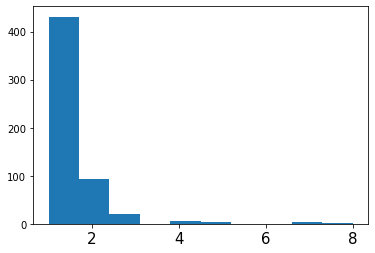

In [54]:
# visualize the range of repetition in our writer list

plt.hist(writer_frequency['Writer'].value_counts());

**Production**

In [24]:
# split and separate the directors from our dataframe

split_studio = df_topfilms['Production'].str.split("/")
studio_data = split_studio.to_list()
studio_names = ['Studio1', "Studio2"]
studio_df = pd.DataFrame(studio_data, columns=studio_names)
studio_df.head()

,Studio1,Studio2
0,Columbia Pictures,None
1,Paramount Pictures,None
2,Paramount Pictures,None
3,Warner Bros. Pictures,Legendary
4,Criterion Collection,None


In [25]:
# concatenate into one column and drop null rows

studio_pull = [studio_df['Studio1'], studio_df['Studio2']]
singular_studio_total = pd.concat(studio_pull)
singular_studio_total.dropna(inplace=True)
singular_studio_total.describe()

count                       258
unique                       89
top       Warner Bros. Pictures
freq                         29
dtype: object

**Directors**

In [26]:
# split and separate the directors from our dataframe

split_director = df_topfilms['Director'].str.split(", ")
director_data = split_director.to_list()
director_names = ['Director1', "Director2", "Director3", "Director4", "Director5"]
director_df = pd.DataFrame(director_data, columns=director_names)
director_df.head()

,Director1,Director2,Director3,Director4,Director5
0,Frank Darabont,None,None,None,None
1,Francis Ford Coppola,None,None,None,None
2,Francis Ford Coppola,None,None,None,None
3,Christopher Nolan,None,None,None,None
4,Sidney Lumet,None,None,None,None


In [27]:
# concatenate into one column and drop null rows

director_pull = [director_df['Director1'], director_df['Director2'], director_df['Director3'], 
                director_df['Director4'], director_df['Director5']]
singular_director_total = pd.concat(director_pull)
singular_director_total.dropna(inplace=True)
singular_director_total.describe()

count                  279
unique                 167
top       Alfred Hitchcock
freq                     9
dtype: object

**Actors**

In [28]:
# split and separate the actors from our dataframe

split_actor = df_topfilms['Actors'].str.split(", ")
actor_data = split_actor.to_list()
actor_names = ['Actor1', 'Actor2', 'Actor3', 'Actor4']
actor_df = pd.DataFrame(actor_data, columns=actor_names)
actor_df.head()

,Actor1,Actor2,Actor3,Actor4
0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,Marlon Brando,Al Pacino,James Caan,Richard S. Castellano
2,Al Pacino,Robert Duvall,Diane Keaton,Robert De Niro
3,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
4,Martin Balsam,John Fiedler,Lee J. Cobb,E.G. Marshall


In [29]:
# concatenate into one column and drop null rows

actor_pull = [actor_df['Actor1'], actor_df['Actor2'], actor_df['Actor3'], 
             actor_df['Actor4']]
singular_actor_total = pd.concat(actor_pull)
singular_actor_total.dropna(inplace=True)
singular_actor_total.describe()

count                  1000
unique                  773
top       Leonardo DiCaprio
freq                      8
dtype: object

#### Step 3: Add each film genre column back into our dataset

This will allow us to directly compare the primary genre of each film to the film's ROI. This lets us spot trends and show Microsoft which films have done the best at the box office.

In [30]:
# add split genre columns back into data frame

df_topfilms['Primary Genre'] = genre_df['Genre1']
df_topfilms['Secondary Genre'] = genre_df['Genre2']
df_topfilms['Tertiary Genre'] = genre_df['Genre3']

df_topfilms.head()

,Title,Year,Rated,Genre,Director,Writer,Actors,Production,Primary Genre,Secondary Genre,Tertiary Genre
0,The Shawshank Redemption,1994,R,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Columbia Pictures,Crime,Drama,None
1,The Godfather,1972,R,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",Paramount Pictures,Crime,Drama,None
2,The Godfather: Part II,1974,R,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",Paramount Pictures,Crime,Drama,None
3,The Dark Knight,2008,PG-13,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Warner Bros. Pictures/Legendary,Action,Crime,Drama
4,12 Angry Men,1957,APPROVED,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Criterion Collection,Crime,Drama,None


### Merge our IMDB dataset with The Numbers

Let's merge our datasets according to the film title and confirm that all of our IMDB top films are accounted for.

In [31]:
# merge The Numbers dataset to connect ROI

merged_dataframe = df_topfilms.merge(df_filmbudgets, left_on='Title', right_on='movie')
merged_dataframe.head()

,Title,Year,Rated,Genre,Director,Writer,Actors,Production,Primary Genre,Secondary Genre,Tertiary Genre,release_date,movie,production_budget,worldwide_gross,worldwide_roi
0,The Shawshank Redemption,1994,R,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Columbia Pictures,Crime,Drama,None,"Sep 23, 1994",The Shawshank Redemption,25000000,28307092,113.228368
1,The Godfather,1972,R,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",Paramount Pictures,Crime,Drama,None,"Mar 15, 1972",The Godfather,7000000,268500000,3835.714286
2,The Godfather: Part II,1974,R,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",Paramount Pictures,Crime,Drama,None,"Dec 11, 1974",The Godfather: Part II,13000000,57300000,440.769231
3,The Dark Knight,2008,PG-13,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Warner Bros. Pictures/Legendary,Action,Crime,Drama,"Jul 18, 2008",The Dark Knight,185000000,1001996207,541.619571
4,12 Angry Men,1957,APPROVED,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Criterion Collection,Crime,Drama,None,"Apr 13, 1957",12 Angry Men,340000,0,0.000000


In [32]:
merged_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              178 non-null    object 
 1   Year               178 non-null    int64  
 2   Rated              178 non-null    object 
 3   Genre              178 non-null    object 
 4   Director           178 non-null    object 
 5   Writer             178 non-null    object 
 6   Actors             178 non-null    object 
 7   Production         178 non-null    object 
 8   Primary Genre      178 non-null    object 
 9   Secondary Genre    161 non-null    object 
 10  Tertiary Genre     104 non-null    object 
 11  release_date       178 non-null    object 
 12  movie              178 non-null    object 
 13  production_budget  178 non-null    int64  
 14  worldwide_gross    178 non-null    int64  
 15  worldwide_roi      178 non-null    float64
dtypes: float64(1), int64(3), o

***

## Data Modeling

### Movie Types That Succeed At The Box Office

Lets determine which type of film types are more likely to pull in a profit for Microsoft.

### Which genres do audiences hold in the highest regard?

The best way to determine our answer is to take our two hundred and fifty most popular films and identify the most popular genres. We can determine the most revered by creating a ranking of the top ten genres and visualizing it below.

In order to dive deeper, we'll also layer in supporting genres that were not considered primary, but did showcase elements of the included films.

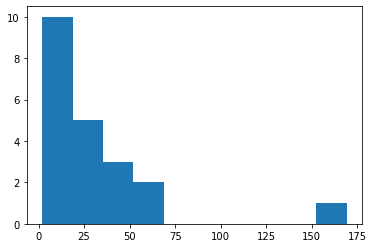

In [33]:
# visualize the range of repetition across all levels of genre

plt.hist(singular_genre_total.value_counts());

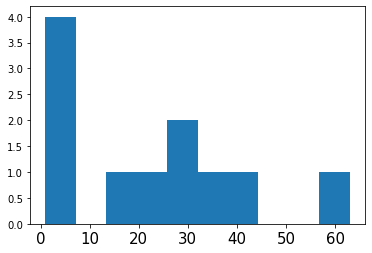

In [57]:
# visualize the range of repetition across primary genres

plt.hist(genre_df['Genre1'].value_counts());

In [35]:
genre_df.describe()

,Genre1,Genre2,Genre3
count,250,227,149
unique,11,20,17
top,Drama,Drama,Thriller
freq,63,90,29


***
This distribution is especially worth keeping in mind as we visualize our top genres. We can see that drama makes up 25% percent of primary genres and 36% of secondary genres.

There are also quite a few genres that are rarely repeated amongst our top 250 films. I still believe they are telling and therefore worth including, but with this small caveat of the distribution at hand.
***

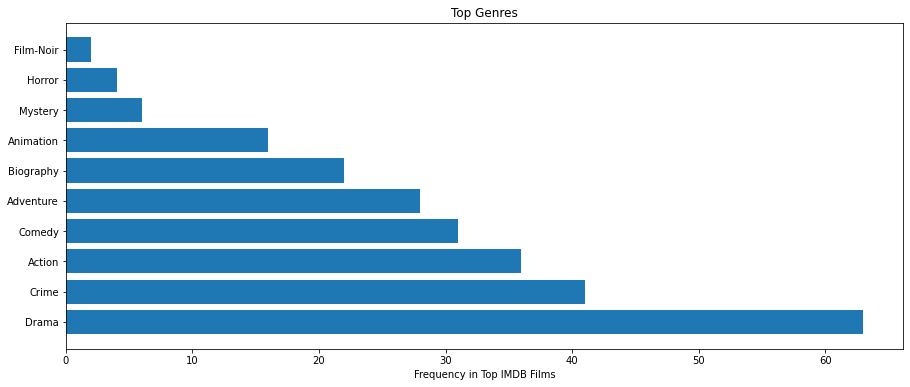

In [36]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# count the occurrence of each class
data = genre_df['Genre1'].value_counts().head(10)
# get x and y data
points = data.index
frequency = data.values 
# create bar chart
ax.barh(points, frequency) 
# set title and labels
ax.set_title('Top Genres')
ax.set_xlabel('Frequency in Top IMDB Films')
plt.rc('xtick', labelsize=10)
plt.rc('xtick', labelsize=10);

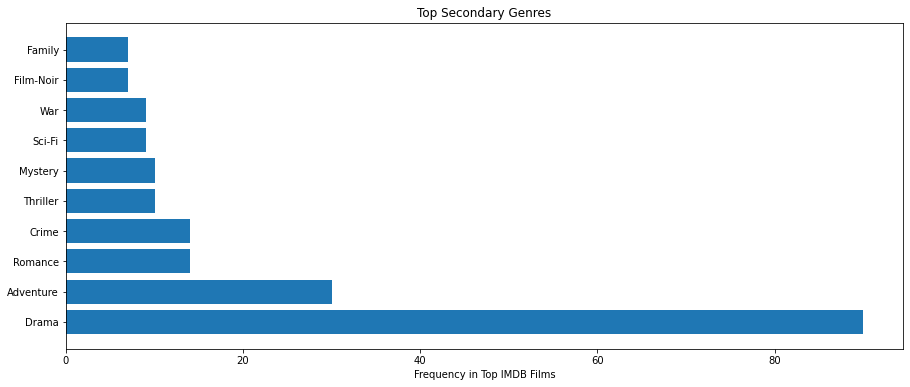

In [37]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# count the occurrence of each class
data = genre_df['Genre2'].value_counts().head(10)
# get x and y data
points = data.index
frequency = data.values 
# create bar chart
ax.barh(points, frequency) 
# set title and labels
ax.set_title('Top Secondary Genres')
ax.set_xlabel('Frequency in Top IMDB Films')
plt.rc('xtick', labelsize=10)
plt.rc('xtick', labelsize=10);

### Which types of films give the most return on investment at the box office?

Here we'll measure the ROI that was brought in on average across the genre. This should give us a greater understanding of which genres tend to impact the bottom line the most.

In [38]:
roi_across_genre = merged_dataframe.groupby(['Primary Genre']).worldwide_roi.mean()
roi_across_genre

Primary Genre
Action        561.278410
Adventure     812.953668
Animation     948.570635
Biography     594.714607
Comedy       1059.882061
Crime         758.877104
Drama        1518.620807
Horror       1432.555019
Mystery       584.394574
Sci-Fi        140.510400
Name: worldwide_roi, dtype: float64

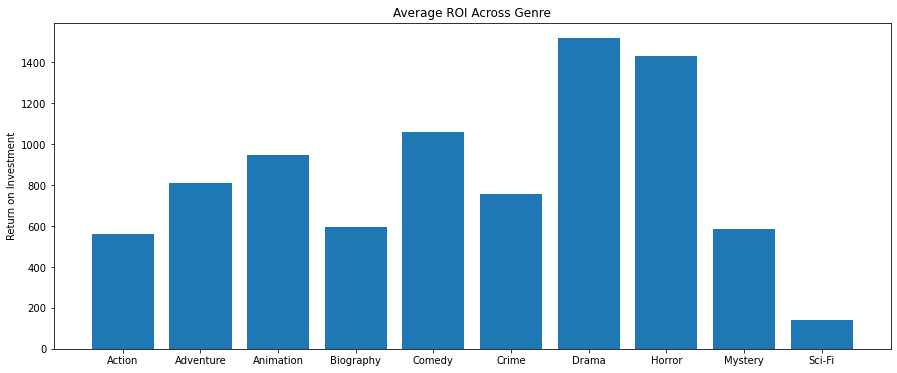

In [39]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15,6))
# count the occurrence of each class 
data = roi_across_genre 
# get x and y data 
genre = data.index 
average = data.values 
# create bar chart 
ax.bar(genre, average) 
# set title and labels 
ax.set_title('Average ROI Across Genre') 
ax.set_ylabel('Return on Investment')
plt.rc('xtick', labelsize=12);

### The Storytellers and Leadership That Know How to Create Great Films

Let's identify which people know how to create and produce great films so we can poach them for Microsoft's new studio.

### Which studios produce the best films?

Let's create a list of the studios that have produced the greatest number of top films on IMDB.

count                       258
unique                       89
top       Warner Bros. Pictures
freq                         29
dtype: object

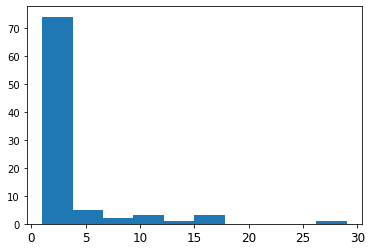

In [40]:
# visualize the range of repetition for production companies

display(singular_studio_total.describe())
plt.hist(singular_studio_total.value_counts());

***
We can see that like film genres - there are clear winners here. This trend really seems to go across our data at varying frequencies.
***

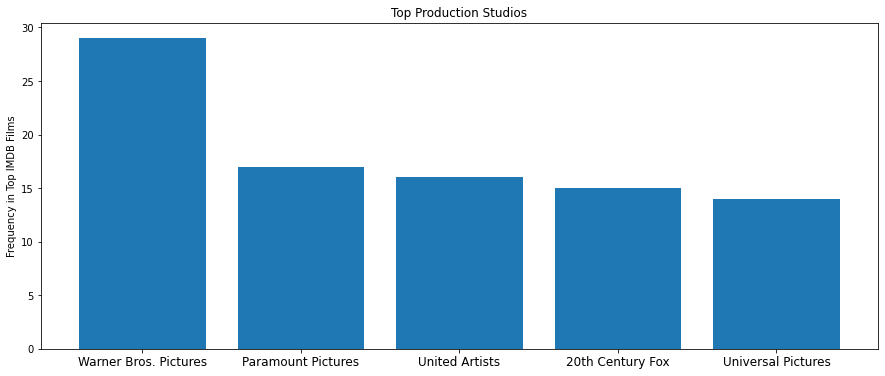

In [41]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15,6))
# count the occurrence of each class 
data = singular_studio_total.value_counts().head(5) 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Top Production Studios') 
ax.set_ylabel('Frequency in Top IMDB Films')
plt.rc('xtick', labelsize=12)
plt.rc('xtick', labelsize=15);

### Which storytellers are most present in the top films?

Let's create a short-list of the storytellers revered for their work in film.

#### Directors

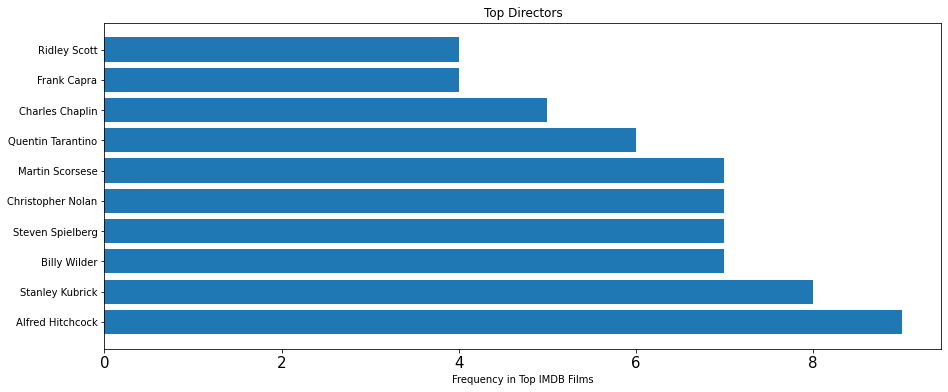

In [42]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15,6))
# count the occurrence of each class 
data = singular_director_total.value_counts().head(10) 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.barh(points, frequency) 
# set title and labels 
ax.set_title('Top Directors') 
ax.set_xlabel('Frequency in Top IMDB Films')
plt.rc('xtick', labelsize=12)
plt.rc('xtick', labelsize=15);

#### Writers

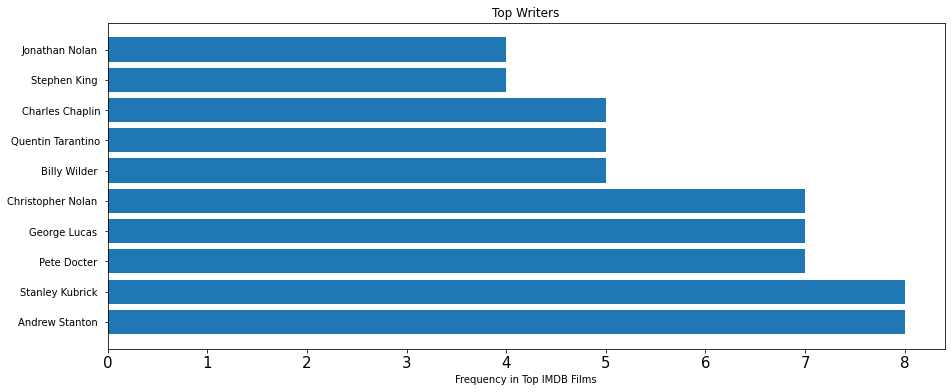

In [55]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15,6))
# count the occurrence of each class 
data = writer_frequency['Writer'].value_counts().head(10) 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.barh(points, frequency) 
# set title and labels 
ax.set_title('Top Writers') 
ax.set_xlabel('Frequency in Top IMDB Films')
plt.rc('xtick', labelsize=12)
plt.rc('xtick', labelsize=15);

#### Actors

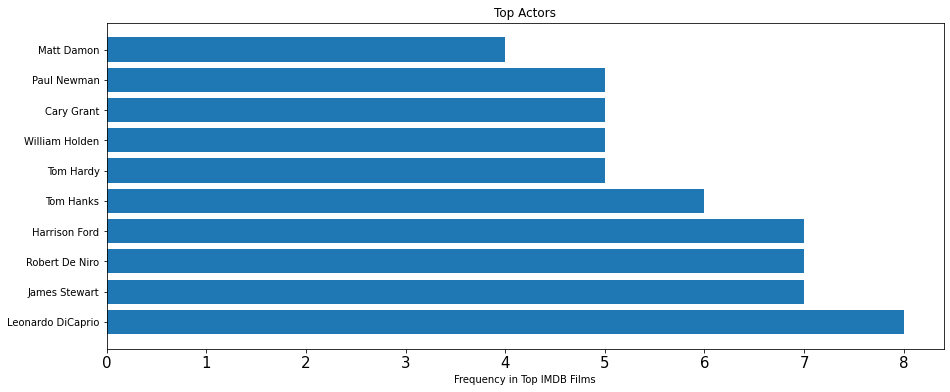

In [44]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15,6))
# count the occurrence of each class 
data = singular_actor_total.value_counts().head(10) 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.barh(points, frequency) 
# set title and labels 
ax.set_title('Top Actors') 
ax.set_xlabel('Frequency in Top IMDB Films')
plt.rc('xtick', labelsize=12)
plt.rc('xtick', labelsize=15);

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

* **Hire revered storytellers.** Our distributions show us that audiences tend to favor particular storytellers above the rest. These films clearly have a much higher chance of winning at the box office.
* **Poach executives and/or collaborate with the top studios.** Since one of Microsoft's greatest pain points is not having the know how to create great films, we need to keep in mind that great filmmakers often need truly great executives behind the scenes in order for their work to flourish. We can poach high quality executives with pre-existing relationships in Hollywood to help us bridge the gap. We also saw that quite a few of the top films had more than one studio on board. We don't have to go it alone, especially in the beginning as we get our bearings.
* **Focus on drama with your content and your wallet.** While there are quite a few ways to expand beyond this primary genre and make a truly great film, this tends to be the backbone of the greats. Microsoft shouldn't ignore this and instead should make the majority of their upcoming releases a Drama as the studio starts up. Due to drama being more of a sure bet, they also should expect more return on investment from budget spent on these films and their advertising.
* **Budget for multiple writers per film.** We can see that there is on average there is more than one writer per film in our IMDB dataset. While this isn't necessary, it tends to point toward a great film.

## Next Steps

This goes beyond our film analysis and is worth further exploration.

* **Groom less experienced storytellers.** If Microsoft develops a repeated process where experienced storytellers groom up and comers, Microsoft is much more likely to develop a steady stream of quality filmmakers that audiences will grow to love. Due to the popularity of streaming, this could mean even there ealier work can get future recognition and revenue.
* **Pay attention to a growing trend toward diversity.** One of Microsoft's primary values stated is diversity and inclusion. Viewers across the US and the world are becoming increasingly diverse and studies show that audiences favor stories that reflect their own. Microsoft has the chance to launch with this sort of understanding in their DNA. While diversity is sometimes noted in Hollywood, there are enormous strides needed (see UCLA's 2020 Diversity Report) and there isn't a larger studio yet that has adamantly stood for diversity in front of and behind the camera. Quality storytellers are starting to make film decisions based on these factors (see efforts like the inclusion rider). Many of the necessary pieces and collaborators are already in existence (see firms like Charles King's MACRO, Scott Budnick's One Community, Ava Duvernay's Array)I believe this is a trend worth betting on for the long term and can make Microsoft stand apart. I'd like to prove it.
* **Expand on our findings to chart increasingly current findings** While our IDMB dataset showed the current top 250 films, there is such a range of years covered that we could determine attributes and trends that have changed over time and would enhance these findings to become increasingly relevant. We could also introduce additional current ways of gauging the success of a film - by introducing streaming metrics and data around evergreen content that continues to take in profit and royalties. We could also expand beyond the medium to enlist Microsoft's studio to create other types of visual content versus long-form films.